In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Data for Cleaning & Modeling.csv', engine='python')
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [3]:
test = pd.read_csv('Holdout for Testing.csv')
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [ ]:
#metadata = pd.read_csv('Metadata.csv', engine = 'python')
#metadata

In [4]:
#Check missing value number
train.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

Quickly check the missing value, we might drop 'X16', 'X25', and 'X26'.

#### Step 1. Data Exploration & Data Cleaning

In [5]:
#Transforming X1 of train data to floats
train['X1'] = train['X1'].str.rstrip('%').astype('float')/100
train['X1']

0         0.1189
1         0.1071
2         0.1699
3         0.1311
4         0.1357
           ...  
399995    0.1299
399996    0.1629
399997    0.1099
399998    0.1757
399999    0.1335
Name: X1, Length: 400000, dtype: float64

In [6]:
#Remove '$'
data = [train, test]

for df in data:
    df['X4'] = df['X4'].str.replace('$', '').str.replace(',', '').astype(float)
    df['X5'] = df['X5'].str.replace('$', '').str.replace(',', '').astype(float)
    df['X6'] = df['X6'].str.replace('$', '').str.replace(',', '').astype(float)
    df['X30'] = df['X30'].str.rstrip('%').astype('float')/100

In [7]:
#Check outcome
train['X4']

0         25000.0
1          7000.0
2         25000.0
3          1200.0
4         10800.0
           ...   
399995    10000.0
399996    13150.0
399997    20000.0
399998    18475.0
399999    16000.0
Name: X4, Length: 400000, dtype: float64

In [8]:
#Filling missing values of numeric variables
data = [train, test]

for df in data:
    df['X4'] = df['X4'].interpolate()
    df['X5'] = df['X5'].interpolate()
    df['X6'] = df['X6'].interpolate()
    df['X21'] = df['X21'].interpolate()
    df['X22'] = df['X22'].interpolate()
    df['X24'] = df['X24'].interpolate()
    df['X27'] = df['X27'].interpolate()
    df['X28'] = df['X28'].interpolate()
    df['X29'] = df['X29'].interpolate()
    df['X30'] = df['X30'].interpolate()
    df['X31'] = df['X31'].interpolate()

In [9]:
train['X4'].isnull().any()

False

In [10]:
#Filling missing values of categorical variables
data = [train, test]

for df in data:
    df['X8'] = df['X8'].fillna('NA')
    df['X9'] = df['X9'].fillna('NA')
    df['X11'] = df['X11'].fillna('NA')
    df['X12'] = df['X12'].fillna('NA')
    df['X14'] = df['X14'].fillna('NA')
    df['X17'] = df['X17'].fillna('NA')
    df['X32'] = df['X32'].fillna('NA')

In [11]:
#Explore correlation between the continuous feature variables
train.corr()

,X1,X2,X3,X4,X5,X6,X13,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
X1,1.000000,0.033545,0.035069,0.177731,0.178725,0.181029,-0.032207,0.158102,0.091660,0.210397,-0.058441,-0.034513,0.020452,0.073578,0.008172,0.342415,-0.027147
X2,0.033545,1.000000,0.994894,0.074648,0.078812,0.087005,0.032964,0.119845,0.078974,-0.015826,-0.040541,-0.159457,0.115167,0.122491,0.022592,-0.007744,0.093876
X3,0.035069,0.994894,1.000000,0.077571,0.081868,0.090367,0.033507,0.118335,0.078849,-0.017545,-0.040254,-0.153880,0.113991,0.124480,0.022683,-0.006497,0.092768
X4,0.177731,0.074648,0.077571,1.000000,0.998358,0.994675,0.359734,0.060623,0.008905,-0.002422,-0.041572,0.009126,0.204428,-0.078938,0.336650,0.117031,0.237455
X5,0.178725,0.078812,0.081868,0.998358,1.000000,0.996634,0.359130,0.062106,0.009519,-0.002642,-0.041704,0.008723,0.205362,-0.078351,0.336277,0.118359,0.237338
X6,0.181029,0.087005,0.090367,0.994675,0.996634,1.000000,0.357265,0.065765,0.010339,-0.004095,-0.038505,0.042647,0.206348,-0.076846,0.334836,0.120629,0.237691
X13,-0.032207,0.032964,0.033507,0.359734,0.359130,0.357265,1.000000,-0.183002,0.060688,0.064709,-0.057152,-0.099963,0.154522,-0.016127,0.325022,0.033615,0.222566
X21,0.158102,0.119845,0.118335,0.060623,0.062106,0.065765,-0.183002,1.000000,-0.001999,0.000231,0.005659,0.083346,0.305151,-0.046225,0.147925,0.206736,0.229760
X22,0.091660,0.078974,0.078849,0.008905,0.009519,0.010339,0.060688,-0.001999,1.000000,0.024421,-0.578255,-0.075937,0.061907,-0.009066,-0.030508,-0.011373,0.133576
X24,0.210397,-0.015826,-0.017545,-0.002422,-0.002642,-0.004095,0.064709,0.000231,0.024421,1.000000,0.006220,-0.088601,0.099851,0.039298,-0.015204,-0.096009,0.134220


In [12]:
#Check Number of payments (36 or 60)
train['X7'].value_counts()

 36 months    292369
 60 months    107630
Name: X7, dtype: int64

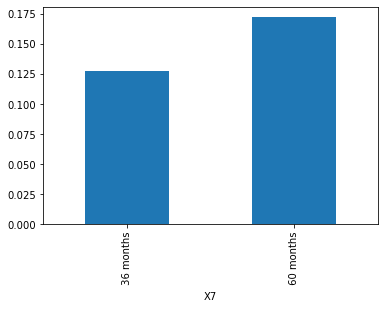

In [13]:
#Check relationship between interest rate and grades
train['X1'].groupby(train['X7']).mean().plot(kind='bar')

In [14]:
#Assign 'is_long_term', for 1 if 'X7' is '60 months', o for '36 months'
data = [train, test]

for df in data:
    df['is_long_term']=df['X7'].apply(lambda x: 1 if x=='60 months' else 0)

train['is_long_term'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_long_term, dtype: int64

In [15]:
#Check grades
train['X8'].unique()

array(['B', 'D', 'C', 'A', 'E', 'F', 'NA', 'G'], dtype=object)

In [16]:
#Check subgrdes
train['X9'].unique()

array(['B4', 'B5', 'D3', 'C2', 'C3', 'D4', 'B3', 'C5', 'A5', 'D2', 'B1',
       'C4', 'A4', 'A3', 'C1', 'E4', 'B2', 'A2', 'E2', 'F4', 'E1', 'D1',
       'F1', 'F2', 'A1', 'F3', 'E5', 'D5', 'NA', 'E3', 'G5', 'F5', 'G1',
       'G4', 'G3', 'G2'], dtype=object)

Loan Status possible values are W, F. W stands for whole loans (Borrowers benefit from getting ‘instant funding’). The rest are available for fractional purchase.

Ref: https://rstudio-pubs-static.s3.amazonaws.com/303215_bb3e159757314931ac706574b96162b7.html

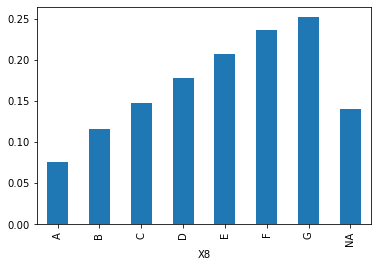

In [17]:
#Check relationship between interest rate and grades
train['X1'].groupby(train['X8']).mean().plot(kind='bar')

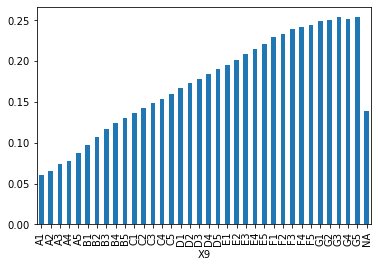

In [18]:
#Check relationship between interest rate and subgrades
train['X1'].groupby(train['X9']).mean().plot(kind='bar')

We can see a clear relationship that grade A has the lowest interest rate and inceasing for the following grades.

From the plots above, we can find the relationship between interest rate and loan status (f, w) is probably irrelevant, but it's lower with NA.

Next, we want to know the the relationship about employed years.

In [19]:
#Number of title
train['X10'].value_counts()

Teacher                             4222
Manager                             3410
Registered Nurse                    1803
RN                                  1711
Supervisor                          1512
                                    ... 
Loan Ops Manager                       1
LyondellBasell Industries              1
Clovernook Health Care                 1
Facility Engineer Asc Manager          1
City of Salina Police Department       1
Name: X10, Length: 187821, dtype: int64

In [20]:
#Assign 'is_employed', if 'X10' is NA, assign 0 as the candidate is not empoyed
data = [train, test]

for df in data:
    df['is_employed'] = df['X10'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [21]:
#Check outcome
train['is_employed']

0         0
1         1
2         1
3         1
4         1
         ..
399995    1
399996    1
399997    1
399998    1
399999    1
Name: is_employed, Length: 400000, dtype: int64

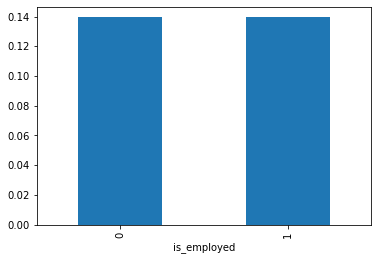

In [22]:
#Check relationship between interest rate and employed status
train['X1'].groupby(train['is_employed']).mean().plot(kind='bar')

It seems like the interest rate doesn't matter with the employed status. Hence, we can drop the job title column later.

Next, we want to know the the relationship about employed years.

In [23]:
#Number of years employed
train['X11'].value_counts()

10+ years    128060
2 years       35427
3 years       31428
< 1 year      30607
5 years       27277
1 year        25321
4 years       24035
6 years       23062
7 years       22837
8 years       19139
NA            17538
9 years       15269
Name: X11, dtype: int64

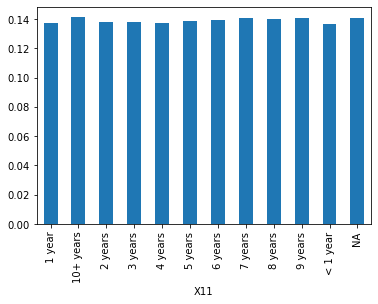

In [24]:
#Check relationship between interest rate and employed years
train['X1'].groupby(train['X11']).mean().plot(kind='bar')

It seems like the interest rate doesn't matter with the employed years. Hence, we can drop the employed years column later.

Next, we want to know the the relationship about home ownership status.

In [25]:
#Home ownership status
train['X12'].value_counts()

MORTGAGE    172112
RENT        136778
NA           61361
OWN          29588
OTHER          124
NONE            36
ANY              1
Name: X12, dtype: int64

In [26]:
#Check relationship between interest rate and home ownership status
train['X1'].groupby(train['X12']).mean().sort_values()

X12
ANY         0.116700
OTHER       0.130771
MORTGAGE    0.136630
NA          0.139873
OWN         0.140926
NONE        0.141663
RENT        0.142537
Name: X1, dtype: float64

In [27]:
#Create 'is_home' column of home ownership status to three levels.
data = [train, test]
status_map={'OWN':'H', #High
            'NONE':'H',
            'RENT':'H',
            'OTHER':'M', #Medium
            'MORTGAGE':'M',
            'NA':'M',
            'ANY':'L', #Low
            }

for df in data:
    df['is_home'] = df['X12'].map(status_map)

train['is_home']

0         H
1         H
2         H
3         H
4         H
         ..
399995    H
399996    H
399997    M
399998    H
399999    M
Name: is_home, Length: 400000, dtype: object

It seems like the interest rate is slight different with home ownership status. Hence, we will keep this column.

Next, we want to know the the relationship about annual income of borrowers.

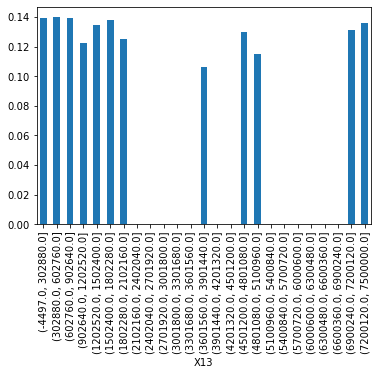

In [28]:
#Plot the historgram of annual income vs interest rate.
train['X1'].groupby(pd.cut(train['X13'], 25)).mean().plot(kind='bar')

From the bar plot, there's not obvious trens for the relationship of annual income and there's alot of missing in column 'X13', so my drop this column. 

In [29]:
#Income verification
train['X14'].value_counts()

VERIFIED - income           149686
not verified                127220
VERIFIED - income source    123093
NA                               1
Name: X14, dtype: int64

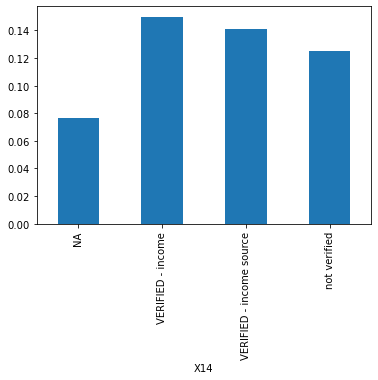

In [30]:
#Check relationship between interest rate and Income verification
train['X1'].groupby(train['X14']).mean().plot(kind='bar')

In [31]:
data = [train, test]

for df in data:
    df['X14'] = df['X14'].replace(['VERIFIED - income'], 'Y_income')
    df['X14'] = df['X14'].replace(['VERIFIED - income source'], 'Y_source')
    df['X14'] = df['X14'].replace(['not verified'], 'N')

train['X14'].value_counts()

Y_income    149686
N           127220
Y_source    123093
NA               1
Name: X14, dtype: int64

In [32]:
#Loan category
train['X17'].value_counts()

debt_consolidation    233794
credit_card            89484
home_improvement       23140
other                  20161
major_purchase          8664
small_business          6287
car                     4861
medical                 3935
moving                  2562
wedding                 2287
vacation                2159
house                   2032
educational              325
renewable_energy         308
NA                         1
Name: X17, dtype: int64

In [33]:
#Check relationship between interest rate and Loan category
train['X1'].groupby(train['X17']).mean().sort_values()

X17
NA                    0.076900
educational           0.114763
car                   0.120443
credit_card           0.127408
major_purchase        0.128262
home_improvement      0.136230
wedding               0.141449
debt_consolidation    0.142284
renewable_energy      0.150287
house                 0.150482
vacation              0.152806
medical               0.154443
other                 0.158894
small_business        0.158925
moving                0.160842
Name: X1, dtype: float64

In [34]:
#Create 'loan_purpose' column of Loan category to three levels.
data = [train, test]
status_map={'moving':'H', #High
            'small_business':'H',
            'other':'H',
            'medical':'H',
            'vacation':'H',
            'house':'H',
            'renewable_energy':'H',
            'debt_consolidation':'M', #Medium
            'wedding':'M',
            'home_improvement':'M',
            'major_purchase':'ML', #Medium-low
            'credit_card':'ML', 
            'car':'ML',
            'educational':'L', #Low
            'NA':'L'
            }
for df in data:
    df['loan_purpose'] = df['X17'].map(status_map)

train['loan_purpose']

0          M
1         ML
2          M
3          M
4          M
          ..
399995    ML
399996     M
399997    ML
399998     M
399999     M
Name: loan_purpose, Length: 400000, dtype: object

In [35]:
#Loan Title
train['X18'].value_counts()

Debt consolidation                          124758
Credit card refinancing                      47942
Debt Consolidation                           15692
Home improvement                             11654
Other                                         9618
                                             ...  
Bills no more                                    1
San Fran Apt                                     1
1 payment loan plan                              1
Debt-free is the way to be                       1
Saying Goodbye to Credit Cards...Forever         1
Name: X18, Length: 61629, dtype: int64

since the titles are too many unique loan titles to try to convert this to a dummy variable feature. we will drop that 'X18' column.

Next, we want to know the the relationship about states of borrowers.

In [36]:
#Label 4 levels of interest rate based on quatile raneges 
state_level = train['X1'].groupby(train['X20']).mean().sort_values()
state_level['label'] = pd.qcut(state_level, q=4, labels=['L', 'M', 'ML', 'H'])
state_level['label']

X20
ID     L
IA     L
ME     L
DC     L
MA     L
NH     L
WI     L
CO     L
OR     L
RI     L
MT     L
VT     L
TX     L
MN     M
MO     M
AZ     M
CT     M
IL     M
CA     M
KS     M
UT     M
GA     M
FL     M
PA     M
OK     M
NM    ML
SD    ML
SC    ML
NJ    ML
WV    ML
VA    ML
LA    ML
WY    ML
MI    ML
NY    ML
AR    ML
KY    ML
OH     H
WA     H
NC     H
MD     H
NV     H
MS     H
DE     H
AL     H
AK     H
IN     H
TN     H
HI     H
NE     H
Name: X1, dtype: category
Categories (4, object): [L < M < ML < H]

In [37]:
#Create 'state_level' column of states to three levels based on quantile ranges.
data = [train, test]
status_map = state_level['label']
for df in data:
    df['state_level'] = df['X20'].map(status_map)

train['state_level']

0          M
1         ML
2         ML
3          L
4          M
          ..
399995     M
399996     L
399997     L
399998     L
399999     L
Name: state_level, Length: 400000, dtype: category
Categories (4, object): [L < M < ML < H]

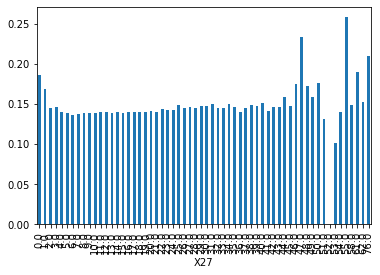

In [38]:
#Number of open credit lines in the borrower's credit file
train['X1'].groupby(train['X27']).mean().plot(kind='bar')

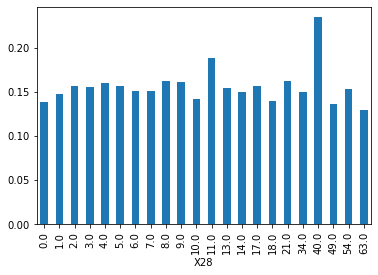

In [39]:
#Number of derogatory public records
train['X1'].groupby(train['X28']).mean().plot(kind='bar')

In [40]:
#Check loan status
train['X32'].unique()

array(['f', 'w', 'NA'], dtype=object)

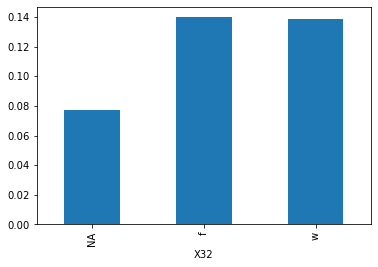

In [41]:
#Check relationship between interest rate and loan status
train['X1'].groupby(train['X32']).mean().plot(kind='bar')

In [42]:
list(train)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'is_long_term',
 'is_employed',
 'is_home',
 'loan_purpose',
 'state_level']

#### Section 2: Prepare training dataframe

In [43]:
#Drop columns
train_use = train.drop(['X2','X3','X7','X8','X10','X11','X12','X13','X15',
                        'X16','X17','X18','X19','X20','X23','X25','X26'], axis = 1)
test_use = test.drop(['X2','X3','X7','X8','X10','X11','X12','X13','X15',
             'X16','X17','X18','X19','X20','X23','X25','X26'], axis = 1)

test_use.head()

,X1,X4,X5,X6,X9,X14,X21,X22,X24,X27,X28,X29,X30,X31,X32,is_long_term,is_employed,is_home,loan_purpose,state_level
0,NaN,6000.0,6000.0,6000.0,C5,Y_income,28.31,0,1,18,0,19861,0.645,33,f,0,1,M,M,H
1,NaN,24000.0,24000.0,24000.0,A1,Y_income,16.03,0,1,12,0,17001,0.262,36,w,0,1,H,M,M
2,NaN,35000.0,35000.0,35000.0,C2,Y_income,32.49,0,0,16,0,25797,0.499,33,w,0,1,M,M,M
3,NaN,10000.0,10000.0,10000.0,D1,Y_source,32.96,0,1,13,1,9586,0.438,21,w,0,1,H,M,M
4,NaN,24000.0,24000.0,24000.0,B1,Y_income,31.03,0,0,27,0,31842,0.413,43,w,0,1,M,M,M


In [44]:
list(test_use)

['X1',
 'X4',
 'X5',
 'X6',
 'X9',
 'X14',
 'X21',
 'X22',
 'X24',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'is_long_term',
 'is_employed',
 'is_home',
 'loan_purpose',
 'state_level']

In [45]:
#Rename columns
data = [train_use, test_use]

for df in data:
    df.rename(columns = {'X1':'interest_rate', 
                         'X4':'loan_amt_rqt', 
                         'X5':'laon_amt_fund', 
                         'X6':'investor_p',
                         'X9':'loan_subgrade',
                         'X14':'income_ver',
                         'X21':'borrower_r',
                         'X22':'delinquency_r',
                         'X24':'num_inq',
                         'X27':'num_cr_line',
                         'X28':'num_derogatory',
                         'X29':'total_cr_balance',
                         'X30':'utilization_r',
                         'X31':'total_cr_line',
                         'X32':'loan_status', 
                         'is_employed':'is_employed', 
                         'is_long_term':'is_long_term', 
                         'is_home':'is_home',
                         'loan_purpose':'loan_purpose',
                         'state_level':'state_level'}, inplace = True)

list(test_use)

['interest_rate',
 'loan_amt_rqt',
 'laon_amt_fund',
 'investor_p',
 'loan_subgrade',
 'income_ver',
 'borrower_r',
 'delinquency_r',
 'num_inq',
 'num_cr_line',
 'num_derogatory',
 'total_cr_balance',
 'utilization_r',
 'total_cr_line',
 'loan_status',
 'is_long_term',
 'is_employed',
 'is_home',
 'loan_purpose',
 'state_level']

In [46]:
test_use.head()

,interest_rate,loan_amt_rqt,laon_amt_fund,investor_p,loan_subgrade,income_ver,borrower_r,delinquency_r,num_inq,num_cr_line,num_derogatory,total_cr_balance,utilization_r,total_cr_line,loan_status,is_long_term,is_employed,is_home,loan_purpose,state_level
0,NaN,6000.0,6000.0,6000.0,C5,Y_income,28.31,0,1,18,0,19861,0.645,33,f,0,1,M,M,H
1,NaN,24000.0,24000.0,24000.0,A1,Y_income,16.03,0,1,12,0,17001,0.262,36,w,0,1,H,M,M
2,NaN,35000.0,35000.0,35000.0,C2,Y_income,32.49,0,0,16,0,25797,0.499,33,w,0,1,M,M,M
3,NaN,10000.0,10000.0,10000.0,D1,Y_source,32.96,0,1,13,1,9586,0.438,21,w,0,1,H,M,M
4,NaN,24000.0,24000.0,24000.0,B1,Y_income,31.03,0,0,27,0,31842,0.413,43,w,0,1,M,M,M


In [47]:
#Convert columns into dummy variables
train_dummies = pd.get_dummies(train_use[['loan_subgrade','income_ver','loan_status','is_home','loan_purpose','state_level']], drop_first=True)
train_dummies

,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,...,loan_status_f,loan_status_w,is_home_L,is_home_M,loan_purpose_L,loan_purpose_M,loan_purpose_ML,state_level_M,state_level_ML,state_level_H
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
399996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
399997,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
399998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [48]:
train_use = train_use.drop(['loan_subgrade','income_ver','loan_status','is_home','loan_purpose','state_level'] , axis=1)
train_use = pd.concat([train_dummies, train_use], axis=1)
train_use.columns

Index(['loan_subgrade_A2', 'loan_subgrade_A3', 'loan_subgrade_A4',
       'loan_subgrade_A5', 'loan_subgrade_B1', 'loan_subgrade_B2',
       'loan_subgrade_B3', 'loan_subgrade_B4', 'loan_subgrade_B5',
       'loan_subgrade_C1', 'loan_subgrade_C2', 'loan_subgrade_C3',
       'loan_subgrade_C4', 'loan_subgrade_C5', 'loan_subgrade_D1',
       'loan_subgrade_D2', 'loan_subgrade_D3', 'loan_subgrade_D4',
       'loan_subgrade_D5', 'loan_subgrade_E1', 'loan_subgrade_E2',
       'loan_subgrade_E3', 'loan_subgrade_E4', 'loan_subgrade_E5',
       'loan_subgrade_F1', 'loan_subgrade_F2', 'loan_subgrade_F3',
       'loan_subgrade_F4', 'loan_subgrade_F5', 'loan_subgrade_G1',
       'loan_subgrade_G2', 'loan_subgrade_G3', 'loan_subgrade_G4',
       'loan_subgrade_G5', 'loan_subgrade_NA', 'income_ver_NA',
       'income_ver_Y_income', 'income_ver_Y_source', 'loan_status_f',
       'loan_status_w', 'is_home_L', 'is_home_M', 'loan_purpose_L',
       'loan_purpose_M', 'loan_purpose_ML', 'state_level_M', 

In [50]:
test_dummies = pd.get_dummies(test_use[['loan_subgrade','income_ver','loan_status','is_home','loan_purpose','state_level']], drop_first=True)
test_use = test_use.drop(['loan_subgrade','income_ver','loan_status','is_home','loan_purpose','state_level'] , axis=1)
test_use = pd.concat([test_dummies, test_use], axis=1)
test_use.columns

Index(['loan_subgrade_A2', 'loan_subgrade_A3', 'loan_subgrade_A4',
       'loan_subgrade_A5', 'loan_subgrade_B1', 'loan_subgrade_B2',
       'loan_subgrade_B3', 'loan_subgrade_B4', 'loan_subgrade_B5',
       'loan_subgrade_C1', 'loan_subgrade_C2', 'loan_subgrade_C3',
       'loan_subgrade_C4', 'loan_subgrade_C5', 'loan_subgrade_D1',
       'loan_subgrade_D2', 'loan_subgrade_D3', 'loan_subgrade_D4',
       'loan_subgrade_D5', 'loan_subgrade_E1', 'loan_subgrade_E2',
       'loan_subgrade_E3', 'loan_subgrade_E4', 'loan_subgrade_E5',
       'loan_subgrade_F1', 'loan_subgrade_F2', 'loan_subgrade_F3',
       'loan_subgrade_F4', 'loan_subgrade_F5', 'loan_subgrade_G1',
       'loan_subgrade_G2', 'loan_subgrade_G3', 'loan_subgrade_G4',
       'loan_subgrade_G5', 'income_ver_Y_income', 'income_ver_Y_source',
       'loan_status_w', 'is_home_M', 'loan_purpose_M', 'loan_purpose_ML',
       'state_level_M', 'state_level_ML', 'state_level_H', 'interest_rate',
       'loan_amt_rqt', 'laon_amt_fund', 

In [51]:
#Take the row where ['interest_rate'] is not NA
train_use = train_use[train_use['interest_rate'].notna()]

train_use['interest_rate'].isnull().any()

False

In [52]:
train_use.isnull().any().

loan_subgrade_A2    False
loan_subgrade_A3    False
loan_subgrade_A4    False
loan_subgrade_A5    False
loan_subgrade_B1    False
                    ...  
total_cr_balance    False
utilization_r       False
total_cr_line       False
is_long_term        False
is_employed         False
Length: 62, dtype: bool

#### Section 3: Spliting Train & Test data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x, y = train_use.drop(['interest_rate'],axis=1), train_use['interest_rate']

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
#Standardized the data
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

#### Decision Tree Regression

In [55]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20)
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [56]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.04


In [57]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.04


In [58]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.04


#### Random Forest Regression

In [59]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)
# Fit 'rf' to the training set
rf.fit(x_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(x_test)
y_pred_train=rf.predict(x_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 0.04
Train set RMSE of rf: 0.04


### Gradient Boost

In [60]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(x_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(x_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.041


Discussion: From the RMSE outcome above, all three models: Decision Tree Regressor, RandomForestRegressor, Gradient Boosting Regressor are seems overfitting for train data. However, I might select RandomForestRegressor mothed because it is good for bias reduction. Random forests are able to work with a very large number of predictors, even more, predictors than there are observations. 

In [86]:
#Use Pickle to save models
models = [dt, rf, gb]

import pickle
with open("models.pckl", "wb") as f:
    for model in models:
         pickle.dump(model, f)

In [64]:
#Use test_used dataframe for predict Titanic results 
testdata = test_use.drop(['interest_rate'], axis=1)

testdata.head()

,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,...,borrower_r,delinquency_r,num_inq,num_cr_line,num_derogatory,total_cr_balance,utilization_r,total_cr_line,is_long_term,is_employed
0,0,0,0,0,0,0,0,0,0,0,...,28.31,0,1,18,0,19861,0.645,33,0,1
1,0,0,0,0,0,0,0,0,0,0,...,16.03,0,1,12,0,17001,0.262,36,0,1
2,0,0,0,0,0,0,0,0,0,0,...,32.49,0,0,16,0,25797,0.499,33,0,1
3,0,0,0,0,0,0,0,0,0,0,...,32.96,0,1,13,1,9586,0.438,21,0,1
4,0,0,0,0,1,0,0,0,0,0,...,31.03,0,0,27,0,31842,0.413,43,0,1


In [71]:
#Check missing column
testdata_c = list(testdata)
train_use_c = list(train_use)
set_difference = set(train_use_c) - set(testdata_c)
list_difference = list(set_difference)

print(list_difference)

['loan_status_f', 'loan_purpose_L', 'interest_rate', 'is_home_L', 'loan_subgrade_NA', 'income_ver_NA']


In [81]:
#Assign columns for dummy variables to math the model

dct = {'loan_status_f': 0, 'loan_purpose_L': 0, 'interest_rate': 0, 'is_home_L':0,  'loan_subgrade_NA':0, 'income_ver_NA':0}
testdata2 = testdata.assign(**dct)
testdata2 = testdata2.drop(['interest_rate'],axis=1)
testdata2.info

<bound method DataFrame.info of        loan_subgrade_A2  loan_subgrade_A3  loan_subgrade_A4  loan_subgrade_A5  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
79995                 1                 0                 0                 0   
79996                 0                 0                 0                 0   
79997                 0                 0                 0                 0   
79998                 0                 0                 0                 0   
79999                 0                 0                 0                 0

In [90]:
pickled_model = pickle.load(open('models.pckl', 'rb'))

#Export prection results
y_pred_rf = pickled_model.predict(testdata2)
np.savetxt('Loan Prediction Results from phhuang3.csv', y_pred_rf, delimiter=',')

Reference:
1. https://github.com/ptyadana/Data-Science-and-Machine-Learning-Projects-Dojo/blob/master/Complete%20Tensorflow%202%20and%20Keras%20Deep%20Learning%20Bootcamp%20-%20JP/03-ANNs/03-Keras-Project-Exercise-Loan-Predictions.ipynb
2. https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/notebook
3. https://stackoverflow.com/questions/65463794/valueerror-unknown-label-type-continuous-in-decisiontreeclassifier